# Calculus Solutions

In [1]:
from sympy import *
from IPython.display import display # This, with init_printing(), will let us "print" to MathJax
init_printing()

For each exercise, fill in the function according to its docstring. 

In [2]:
x, y, z = symbols('x y z')

## Derivatives

Compute the following

$$ \frac{d}{dx}\sin(x)e^x$$
$$ \frac{\partial}{\partial x}\sin(xy)e^x $$
$$ \frac{\partial^2}{\partial x\partial y}\sin(xy)e^x $$


In [3]:
diff(sin(x)*exp(x), x)

In [4]:
diff(sin(x*y)*exp(x), x)

In [5]:
diff(sin(x*y)*exp(x), x, y)

Recall l'Hopital's rule, which states that if $$\lim_{x\to x_0}\frac{f(x)}{g(x)}$$ is $\frac{0}{0}$, $\frac{\infty}{\infty}$, or $-\frac{\infty}{\infty}$, then it is equal to $$\lim_{x\to x_0} \frac{f'(x)}{g'(x)}$$ (we will not consider other indeterminate forms here).  

Write a function that computes $\lim_{x\to x_0}\frac{f(x)}{g(x)}$. Use the `fraction` function to get the numerator and denominator of an expression, for example

In [6]:
fraction(x/y)

You may assume that the only indeterminate forms are the ones mentioned above, and that l'Hopital's rule will terminate after a finite number of steps. Do not use `limit` (use `subs`). Remember that after taking the derivatives, you will need to put the expression into the form $\frac{f(x)}{g(x)}$ before applying l'Hopital's rule again (what function did we learn that does this?).

In [7]:
def lhopital(expr, x, x0):
    """
    Computes limit(expr, x, x0) using l'Hopital's rule.

    >>> lhopital(sin(x)/x, x, 0)
    1
    >>> lhopital(exp(x)/x**2, x, oo)
    oo
    >>> lhopital((x**2 - 4*x + 4)/(2 - x), x, 2)
    0
    >>> lhopital(cos(x), x, 0)
    1
    >>> lhopital((x + sin(x))/x, x, 0)
    2
    """
    expr = cancel(expr)
    expr_num, expr_den = fraction(expr)
    expr_num_eval, expr_den_eval = expr_num.subs(x, x0), expr_den.subs(x, x0)
    indeterminates = [(0, 0), (oo, oo), (-oo, oo), (oo, -oo), (-oo, -oo)]
    if (expr_num_eval, expr_den_eval) in indeterminates:
        return lhopital(expr_num.diff(x)/expr_den.diff(x), x, x0)
    return expr_num_eval/expr_den_eval

In [8]:
lhopital(sin(x)/x, x, 0)

In [9]:
lhopital(exp(x)/x**2, x, oo)

In [10]:
lhopital((x**2 - 4*x + 4)/(2 - x), x, 2)

In [11]:
lhopital(cos(x), x, 0)

In [12]:
lhopital((x + sin(x))/x, x, 0)

## Integrals

Recall that the mean value of a function on an interval $[a, b]$ can be computed by the formula

$$\frac{1}{b - a}\int_{a}^{b} f{\left (x \right )} dx. % Why doesn't \, work? $$

Write a function that computes the mean value of an expression on a given interval.

In [13]:
def average_value(expr, x, a, b):
    """
    Computes the average value of expr with respect to x on [a, b].

    >>> average_value(sin(x), x, 0, pi)
    2/pi
    >>> average_value(x, x, 2, 4)
    3
    >>> average_value(x*y, x, 2, 4)
    3*y
    """
    return integrate(expr, (x, a, b))/(b - a)

In [14]:
average_value(sin(x), x, 0, pi)

In [15]:
average_value(x, x, 2, 4)

In [16]:
average_value(x*y, x, 2, 4)

Write a function that takes a list of expressions and produces an "integral table", like

1. $$\int \sin(x)dx = -\cos(x) + C$$
2. $$\int \cos(x)dx = \sin(x) + C$$
3. $$\int e^xdx = e^x + C$$
4. $$\int \log(x)dx = x(\log(x) - 1) + C$$

In [17]:
def int_table(exprs, x):
    """
    Produces a nice integral table of the integrals of exprs

    >>> int_table([sin(x), cos(x), exp(x), log(x)], x)
    ⌠
    ⎮ sin(x) dx = C - cos(x)
    ⌡
    ⌠
    ⎮ cos(x) dx = C + sin(x)
    ⌡
    ⌠
    ⎮  x           x
    ⎮ ℯ  dx = C + ℯ
    ⌡
    ⌠
    ⎮ log(x) dx = C + x⋅log(x) - x
    ⌡
    """
    C = symbols('C')
    
    for expr in exprs:
        display(Eq(Integral(expr, x), integrate(expr, x) + C))

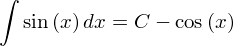

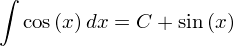

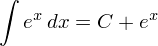

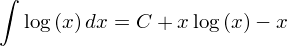

In [18]:
int_table([sin(x), cos(x), exp(x), log(x)], x)

Now use your function to compute the integrals in this Mathematica ad.  Remember that the inverse trig functions are spelled like `asin` in SymPy. 

The ad below probably has a typo, because one of the integrals is trivial to compute. Include what you think the integral should be, and see if SymPy can compute that as well.

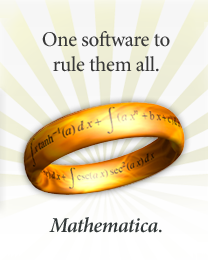

In [19]:
from IPython.core.display import Image 
Image(filename='../imgs/Mathematica-ring-a.png') 

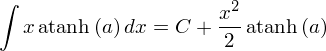

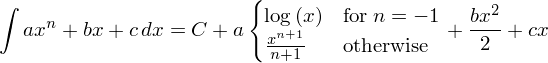

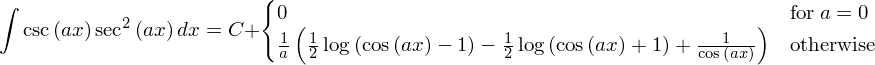

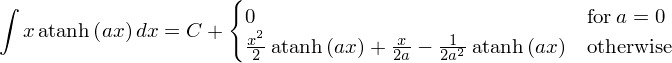

In [20]:
a, b, c, n = symbols('a b c n')
int_table([x*atanh(a), a*x**n + b*x + c, csc(a*x)*sec(a*x)**2, x*atanh(a*x)], x)

## Limits

Recall that the definition of the derivative of $f(x)$ at $x=x_0$ is $$f'(x_0) = \lim_{x\to x_0}\frac{f(x) - f(x_0)}{x - x_0}.$$  Write a function that computes the derivative using the limit definition, using `limit`.

In [21]:
def lim_deriv(expr, x, x0):
    """
    Computes the derivative of expr with respect to x at x0 using the limit definition.

    >>> lim_deriv(x**2, x, 0)
    0
    >>> lim_deriv(cos(x*y), x, pi)
    -y*sin(pi*y)
    
    Note that we must use this trick to take the derivative without evaluating at a point.
    >>> lim_deriv(exp(x**2), x, y).subs(y, x)
    2*x*exp(x**2)
    """
    return limit((expr - expr.subs(x, x0))/(x - x0), x, x0)

In [22]:
lim_deriv(x**2, x, 0)

In [23]:
lim_deriv(cos(x*y), x, pi)

The function you wrote above to compute limits using l'Hopital's rule is very fragile. And even if you try to make it sophisticated, it will still be unable to compute many limits.  Try it on the following limits, and see what happens. Then try computing the same limits with `limit`. 

1. $$\lim_{x\to 0}\frac{\log(x)}{x}$$
2. $$\lim_{x\to \infty}\frac{2^x}{3^x} \textbf{Warning: Be sure to save the notebook before you test this one, and be prepared to kill the kernel!}$$
3. $$\lim_{x\to \infty}x\sin{\left(\frac{1}{x}\right)}$$
4. $$\lim_{x\to 1}\arctan\left(\frac{1}{1 - x}\right)\; \text{Remember that $\arctan$ is called }\mathtt{atan}\text{ in SymPy}$$

In [24]:
lhopital(log(x)/x, x, 0)

In [25]:
limit(log(x)/x, x, 0)

In [26]:
lhopital(2**x/3**x, x, oo) XXX: Don't run. This hangs the notebook

SyntaxError: invalid syntax (<ipython-input-26-daf458c59400>, line 1)

In [27]:
limit(2**x/3**x, x, oo)

In [28]:
lhopital(x**(1/x**2), x, 0)

In [29]:
limit(x**(1/x**.5), x, 0)

In [30]:
lhopital(x*sin(1/x), x, oo)

In [31]:
limit(x*sin(1/x), x, oo)

In [32]:
lhopital(atan(1/(1 - x)), x, 1)

In [33]:
limit(atan(1/(1 - x)), x, 1)

## Series

The Fibonicci sequence is rexcursively defined by 

$$F_0 = 0,$$
$$F_1 = 1,$$
$$F_n = F_{n - 1} + F_{n - 2}.$$

The first few vales are 0, 1, 1, 2, 3, 5, 8, 13, 21, …

The Fibonicci sequence has a generating function given by $$s(x) = \frac{x}{1 - x - x^2}$$ (see http://en.wikipedia.org/wiki/Fibonacci_number#Power_series for a derivation). What this means is that if we expand $s(x)$ as a power series, the coefficients are the Fibonicci numbers, $$s(x) = \sum_{n=0}^\infty F_nx^n$$

Write a function that uses series to compute the nth Fibonicci number. 

Hint: `expr.coeff(x, n)` will give the coefficient of $x^n$ in an expression. For example

In [34]:
(1 + 2*x - x**2).coeff(x, 0)

In [35]:
(1 + 2*x - x**2).coeff(x, 1)

In [36]:
(1 + 2*x - x**2).coeff(x, 2)

In [37]:
def fib(n):
    """
    Uses series expansion and a generating function to compute the nth Fibonnicci number.

    >>> fib(0)
    0
    >>> fib(4)
    3
    >>> fib(9)
    34
    """
    s = x/(1 - x - x**2)
    return s.series(x, 0, n + 1).coeff(x, n)

In [38]:
fib(0)

In [39]:
fib(4)

In [40]:
fib(9)

Note: if you really want to compute Fibonicci numbers, there is a function in SymPy called `fibonicci` that can do this far more efficiently.

In [41]:
[fibonacci(i) for i in range(10)]

`series` is nice if you want a fixed power series, but what if you don't know ahead of time how many terms you want? For that, there is the `lseries` method, which returns a generator of series terms.  This is more efficient than recomputing the whole series again if you determine you need more terms. Here is an example usage (**Warning**: since series are in general infinite, `lseries` will return an infinite generator. Here we use `zip` to limit the number of terms).

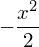

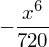

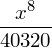

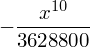

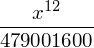

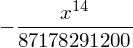

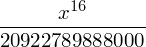

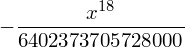

In [42]:
for term, _ in zip(cos(x).lseries(x, 0), range(10)):
    display(term)

Write a function that computes the number of terms of a series expansion of a given function are needed to compute the given value near the given point within the given accuracy. For example, in the expansion of cos(x) near $\pi$, suppode we wish to compute $\pi + 1$. Let us see if terms up to $O(x^6)$ are sufficient (remember that due to a limitation in SymPy, when computing the series away from 0 with `series`, we have to use a shift)

In [43]:
a = cos(x).series(x, pi, 5).removeO().subs(x, x - pi).evalf(subs={x: pi + 1})
a

In [44]:
b = cos(pi + 1).evalf()
b

So the expansion is accurate up to two places after the decimal point, i.e., within `0.01`. 

In [45]:
abs(a - b) < 0.01

True

Note, with `lseries`, we do not need to worry about shifts

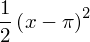

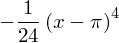

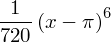

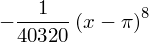

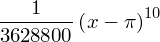

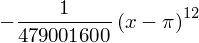

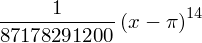

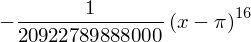

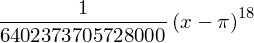

In [46]:
for term, _ in zip(cos(x).lseries(x, pi), range(10)):
    display(term)

Hint: to get the exponent from a term like `3*(x - 1)**5`, use `as_coeff_exponent`. 

In [47]:
(3*(x - 1)**5).as_coeff_exponent(x - 1)

In [48]:
def series_accuracy(func, expansion_point, evaluation_point, accuracy, x):
    """
    Returns n such that series terms up to and including (x - expansion_point)**n 
    (i.e., O((x - expansion_point)**(n + 1)) are needed to compute func at 
    evaluation_point within the given accuracy.

    >>> series_accuracy(cos(x), pi, pi + 1, 0.01, x)
    4
    >>> series_accuracy(exp(x), 1, 10, 1, x)
    23
    """
    # Make sure to compute as many digits as needed. evalf defaults to 15, so this
    # is not actually needed for any of the doctest examples.
    digits = max(15, round(1/accuracy) + 1)
    real_value = func.evalf(digits, subs={x: evaluation_point})
    expansion = 0
    for term in func.lseries(x, expansion_point):
        expansion += term
        series_value = expansion.evalf(digits, subs={x: evaluation_point})
        if abs(real_value - series_value) < accuracy:
            return term.as_coeff_exponent(x - expansion_point)[1]

In [49]:
series_accuracy(cos(x), pi, pi + 1, 0.01, x)

In [50]:
series_accuracy(exp(x), 1, 10, 1, x)